# Hybarid test

In [2]:
import matplotlib
matplotlib.use("pdf")
%matplotlib inline
import matplotlib.pyplot as plt
import rebound
print(rebound.__build__)
import numpy as np
from timeit import Timer

Feb  9 2016 09:15:44


In [64]:
def perform(x):
    dt = x
    sim = rebound.Simulation()
    sim.add(m=1, r=0.005)
    sim.add(m=5e-5, a=.5, r=1.6e-4)
    sim.add(m=5e-5, a=.7, e=0.01, r=1.6e-4)
    Nplanetesimal = 100
    for i in range(Nplanetesimal):
        sim.add(m=1e-8,a=np.random.uniform(0.45,0.75),f=np.random.uniform(0,2.*np.pi),r=4e-5)
    sim.N_active = sim.N-Nplanetesimal
    sim.testparticle_type = 1
    sim.collision = "direct"
    sim.collision_resolve = "merge"
    sim.collisions_track_dE = 1
    sim.integrator = "hybarid"
    sim.ri_hybarid.switch_ratio = 2.
    sim.ri_hybarid.CE_radius = 15.
    sim.dt = dt
    E0 = sim.calculate_energy()
    timing = Timer(lambda: sim.integrate(100.)).timeit(number=1)
    Ef = sim.calculate_energy() + sim.collisions_dE
    return (timing, abs((E0-Ef)/E0))

In [71]:
Ndts = 100
dts = np.logspace(-4,-1,Ndts)
res = []
#for dt in dts:
#    x = dt
#    res.append(perform(x))
from rebound.interruptible_pool import InterruptiblePool
pool = InterruptiblePool()
res = pool.map(perform,dts)    

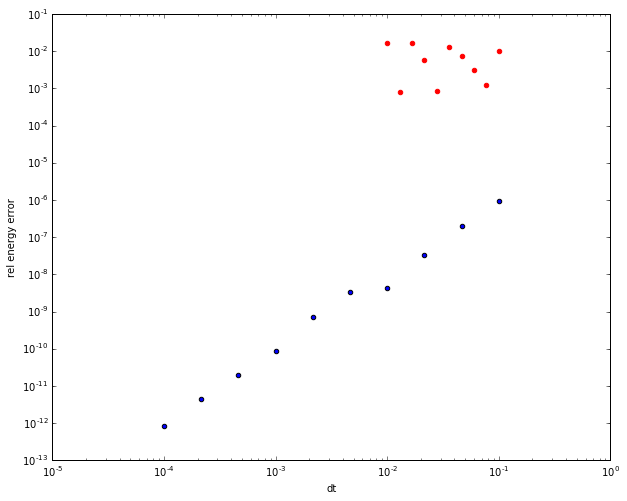

In [70]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('dt')
#ax.set_ylim([1e-16,1.])
ax.set_ylabel('rel energy error')
error = [e for t,e in res]
timing = [t for t,e in res]
errorWH = [e for t,e in resWH]
timingWH = [t for t,e in resWH]
ax.scatter(dts,error)
ax.scatter(dtsWH,errorWH, color="red")

In [55]:
def performWH(x):
    dt = x
    sim = rebound.Simulation()
    sim.add(m=1, r=0.005)
    sim.add(m=5e-5, a=.5, r=1.6e-4)
    sim.add(m=5e-5, a=.7, e=0.01, r=1.6e-4)
    Nplanetesimal = 100
    for i in range(Nplanetesimal):
        sim.add(m=1e-8,a=np.random.uniform(0.45,0.75),f=np.random.uniform(0,2.*np.pi),r=4e-5)
    sim.N_active = sim.N-Nplanetesimal
    sim.testparticle_type = 1
    sim.collision = "direct"
    sim.collision_resolve = "merge"
    sim.collisions_track_dE = 1
    sim.integrator = "whfast"
    sim.dt = dt
    E0 = sim.calculate_energy()
    timing = Timer(lambda: sim.integrate(100.)).timeit(number=1)
    Ef = sim.calculate_energy() + sim.collisions_dE
    return (timing, abs((E0-Ef)/E0))

In [57]:
Ndts = 10
dtsWH = np.logspace(-2,-1,Ndts)
resWH = []
for dt in dtsWH:
    x = dt
    resWH.append(performWH(x))